
----- Training Models for All Features -----

Sim_Adaptive Boosting Ensemble (All Features) Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


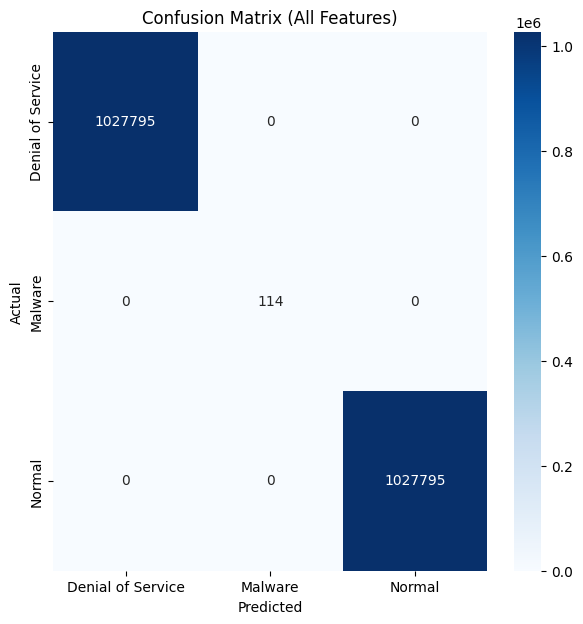


----- Training Models for IG Top 5 Features -----

Sim_Adaptive Boosting Ensemble (IG Top 5 Features) Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


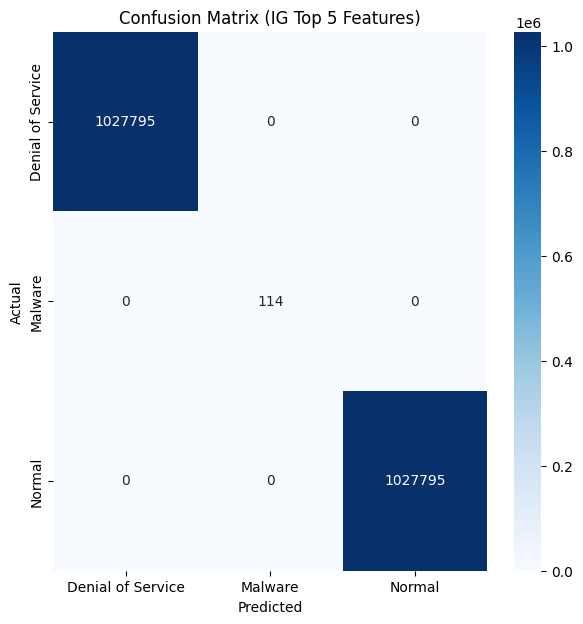


----- Training Models for IG Top 10 Features -----

Sim_Adaptive Boosting Ensemble (IG Top 10 Features) Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


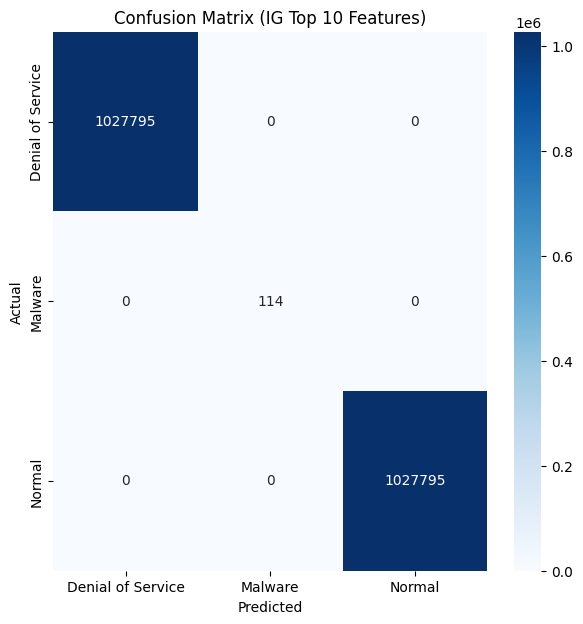


----- Training Models for KBest Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Sim_Adaptive Boosting Ensemble (KBest Top 5 Features) Metrics:
Accuracy: 0.9988816483306935
Precision: 0.998828503813233
Recall: 0.9988816483306935
F1 Score: 0.9988539787008605


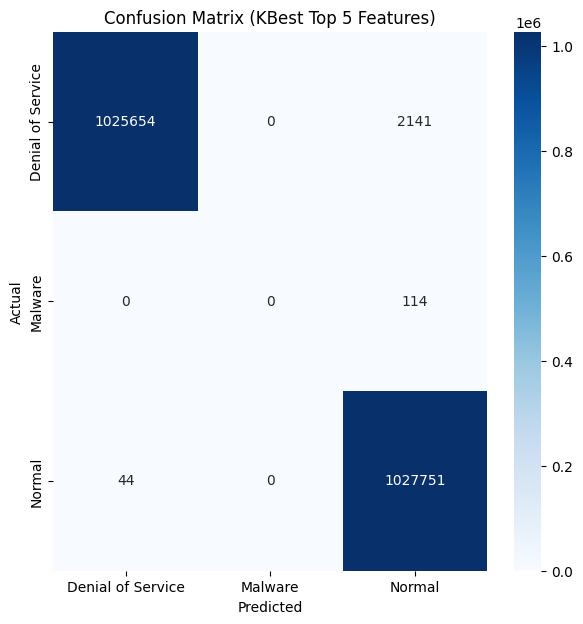


----- Training Models for KBest Top 10 Features -----

Sim_Adaptive Boosting Ensemble (KBest Top 10 Features) Metrics:
Accuracy: 0.9999265458451216
Precision: 0.9999265566351606
Recall: 0.9999265458451216
F1 Score: 0.9999265458447253


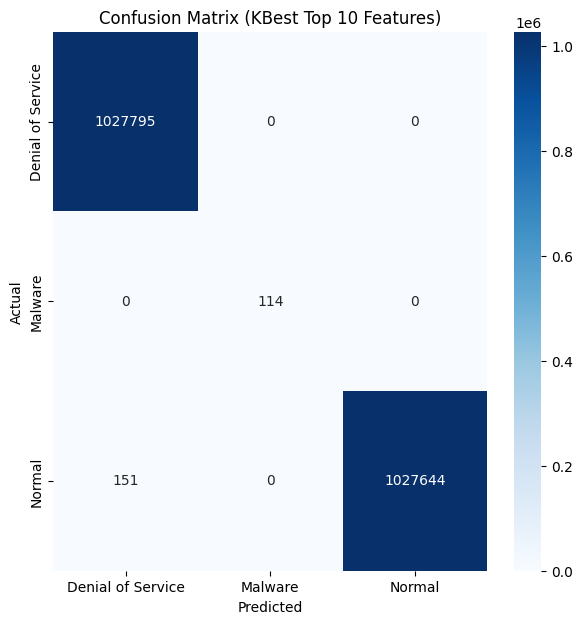

In [1]:
from sklearn.ensemble import AdaBoostClassifier
import time
import numpy as np
import sys
sys.path.append('/home/ibibers/IDS Project/IDS-Machine-Learning-Techniques-')
from Simargl import data_preprocessing, evaluate_model, plot_confusion_matrix


# ---------------------------- Model Training and Evaluation ----------------------------
results = []
datasets, le = data_preprocessing()
for name, (X_tr, X_te, y_train , y_test) in datasets.items():
    print(f"\n----- Training Models for {name} -----")

    start_time = time.time()

    AdaB_model = AdaBoostClassifier()

    AdaB_model.fit(X_tr, y_train)
    train_end_time = time.time()

    y_pred_enc = AdaB_model.predict(X_te)
    pred_end_time = time.time()

    metrics = evaluate_model(y_test, y_pred_enc, f"Sim_Adaptive Boosting Ensemble ({name})")
    metrics['Training Time (s)'] = train_end_time - start_time
    metrics['Prediction Time (s)'] = pred_end_time - train_end_time
    metrics['Total Time (s)'] = pred_end_time - start_time
    results.append(metrics)

    plot_confusion_matrix(y_test, y_pred_enc, le.classes_, f"Confusion Matrix ({name})")


In [2]:

# ---------------------------- Summary and Save Results ----------------------------
import pandas as pd
summary = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary)

summary.to_csv("Sim_ADA_ensemble_classifier_evaluation_summary.csv", index=False)



Summary of Results:
                                               Model  Accuracy  Precision  \
0      Sim_Adaptive Boosting Ensemble (All Features)  1.000000   1.000000   
1  Sim_Adaptive Boosting Ensemble (IG Top 5 Featu...  1.000000   1.000000   
2  Sim_Adaptive Boosting Ensemble (IG Top 10 Feat...  1.000000   1.000000   
3  Sim_Adaptive Boosting Ensemble (KBest Top 5 Fe...  0.998882   0.998829   
4  Sim_Adaptive Boosting Ensemble (KBest Top 10 F...  0.999927   0.999927   

     Recall  F1 Score  Training Time (s)  Prediction Time (s)  Total Time (s)  
0  1.000000  1.000000        1366.731965             6.729537     1373.461502  
1  1.000000  1.000000         419.205238             3.252888      422.458126  
2  1.000000  1.000000         682.052235             3.904065      685.956300  
3  0.998882  0.998854         220.767832             3.634125      224.401957  
4  0.999927  0.999927         884.337550             9.577069      893.914619  
